In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import csv
import os
from gdx import gdx
from datetime import datetime

%matplotlib inline

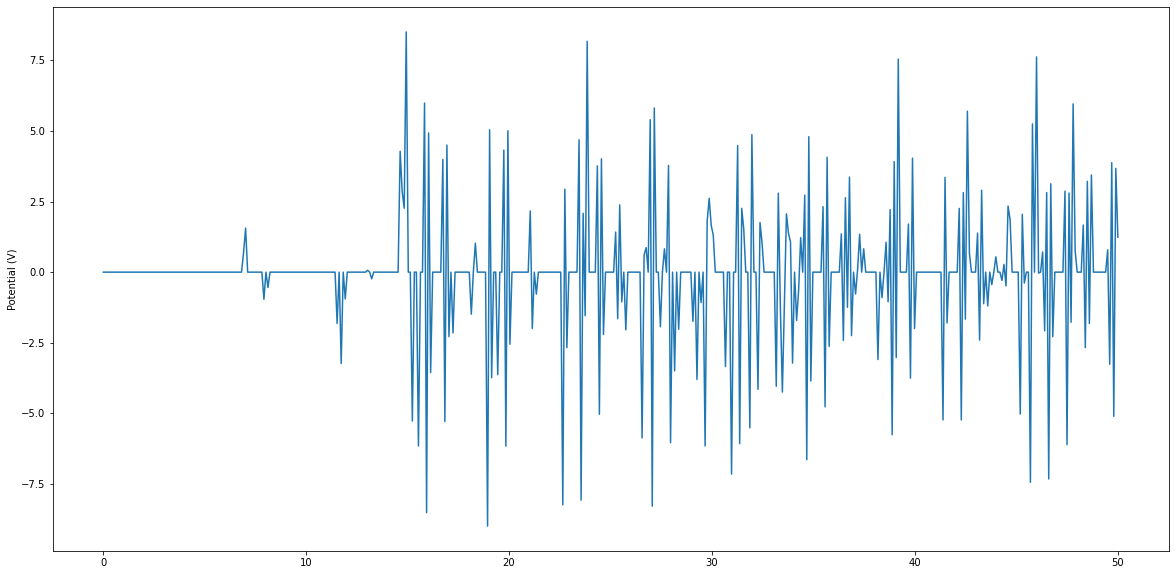

In [3]:
df = pd.read_csv("csvexample2.csv",header=0)
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=np.linspace(0,50,500),y=df['Potential (V)'], ax=ax)

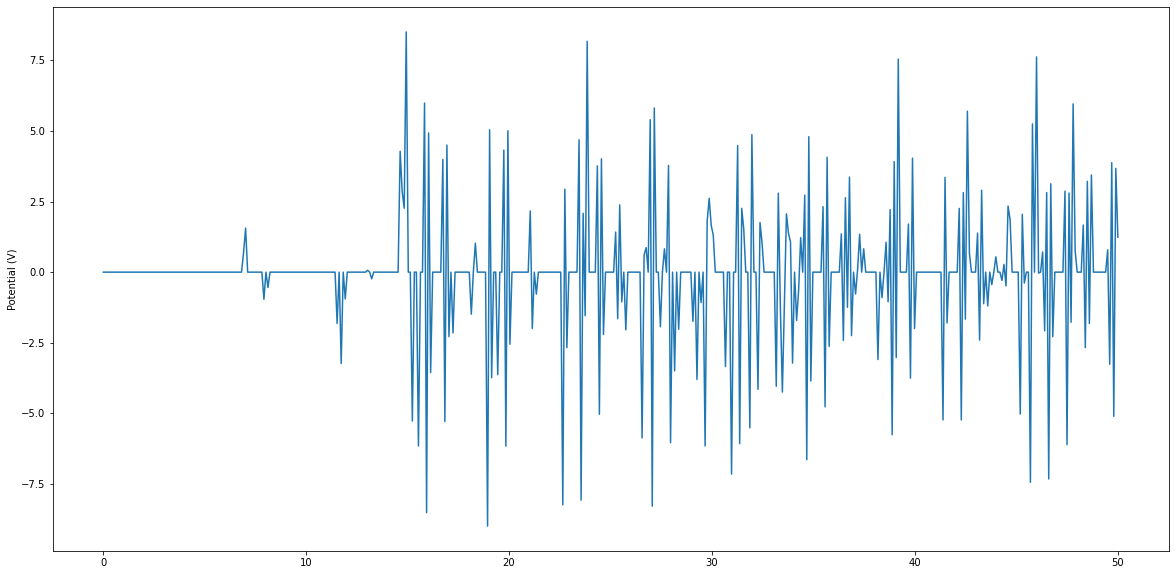

In [59]:
df2 = pd.read_csv("csvexample2.csv", header=0)
fig, ax = plt.subplots(figsize=(20,10))
# ax.set(xlabel="Seconds (sample rate = 10ms)", ylabel = "Potential (V)")
sns.lineplot(x=np.linspace(0,50,500),y=df2['Potential (V)'], ax=ax)

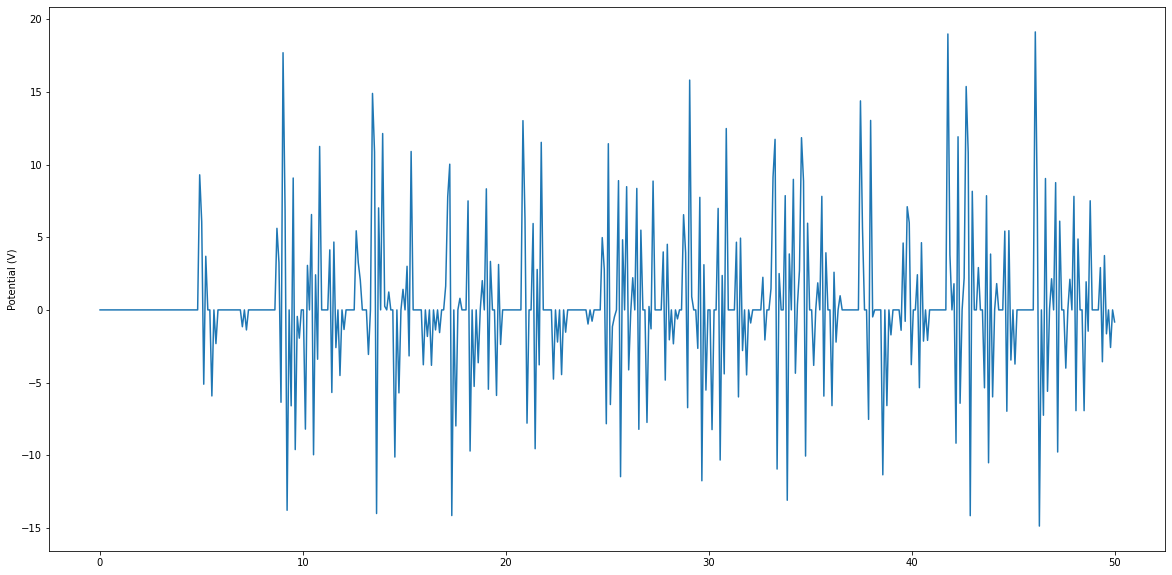

In [4]:
df3 = pd.read_csv("csvexample3.csv", header=0)
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=np.linspace(0,50,500),y=df3['Potential (V)'], ax=ax)

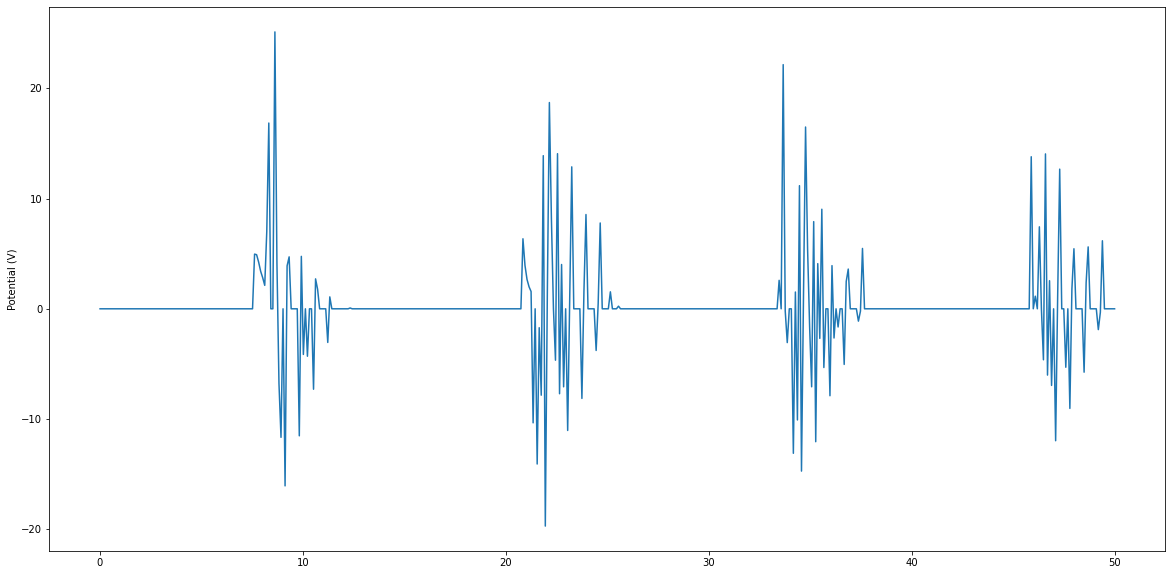

In [43]:
df4 = pd.read_csv("csvexample4.csv", header =0)
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=np.linspace(0,50,500), y= df4['Potential (V)'],ax=ax)

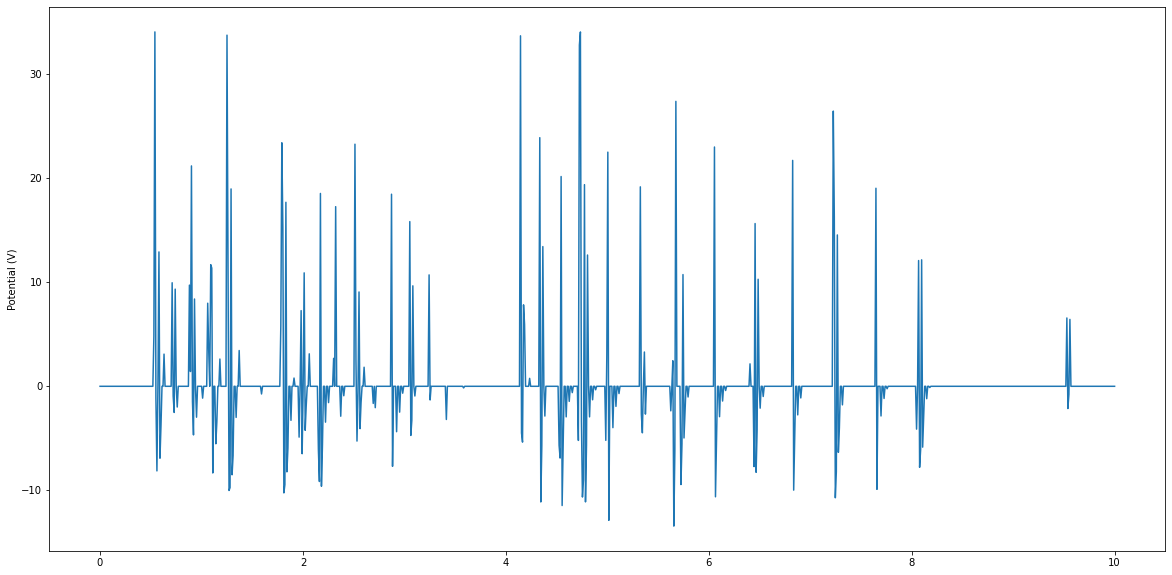

In [5]:
test1 = pd.read_csv("test1_3cm.csv", header=0)
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=np.linspace(0,10,1000), y=test1['Potential (V)'], ax=ax)

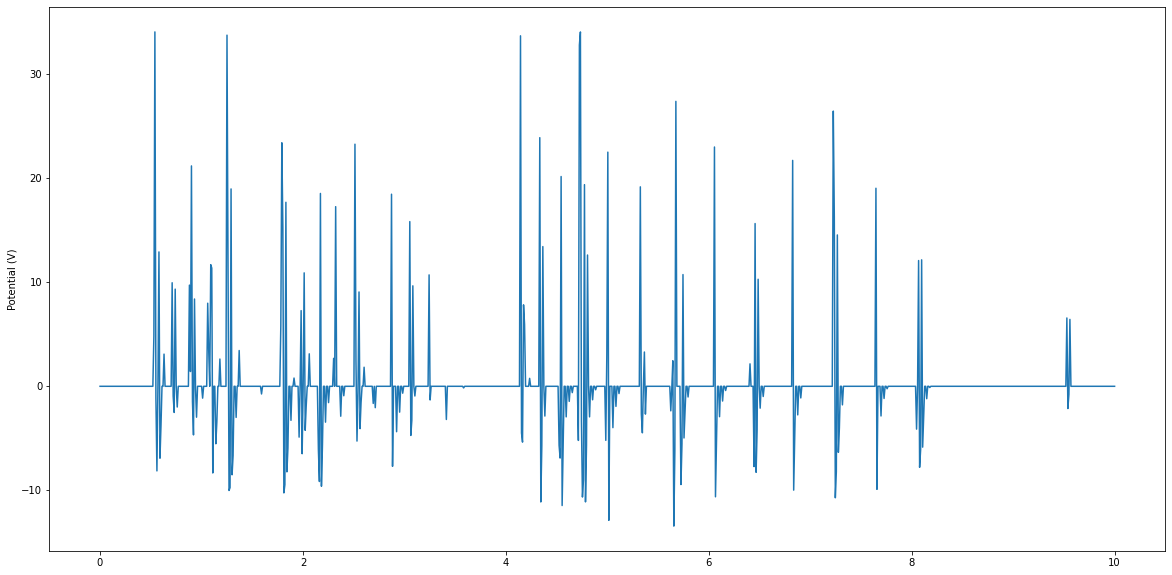

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=np.linspace(0,10,1000), y = test1['Potential (V)'], ax=ax)

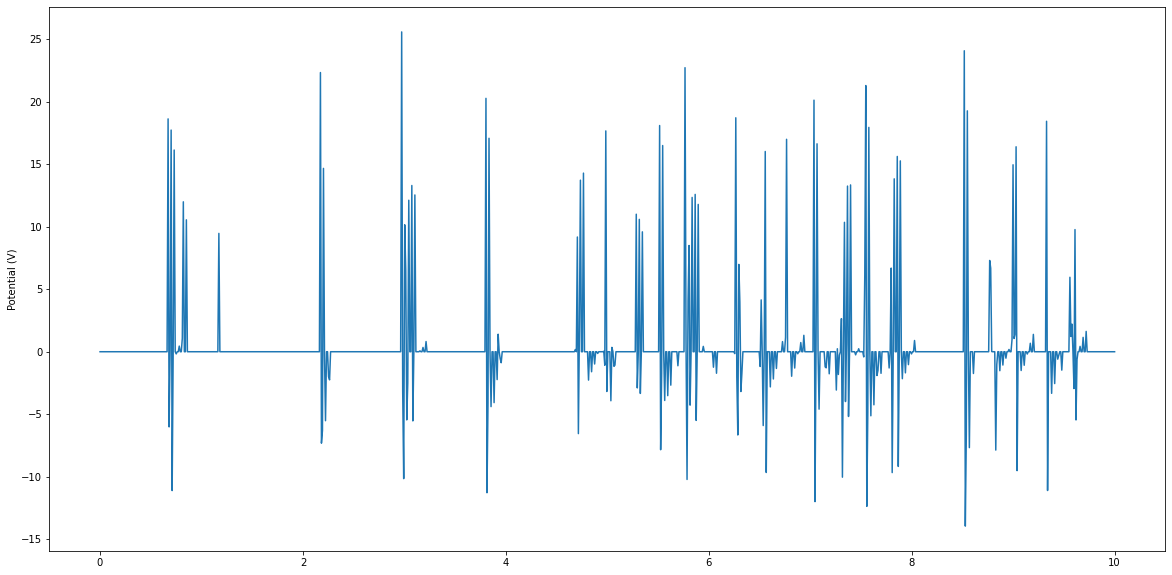

In [46]:
test2 = pd.read_csv("test2_6inch.csv", header=0)
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=np.linspace(0,10,1000),y= test2['Potential (V)'], ax=ax)

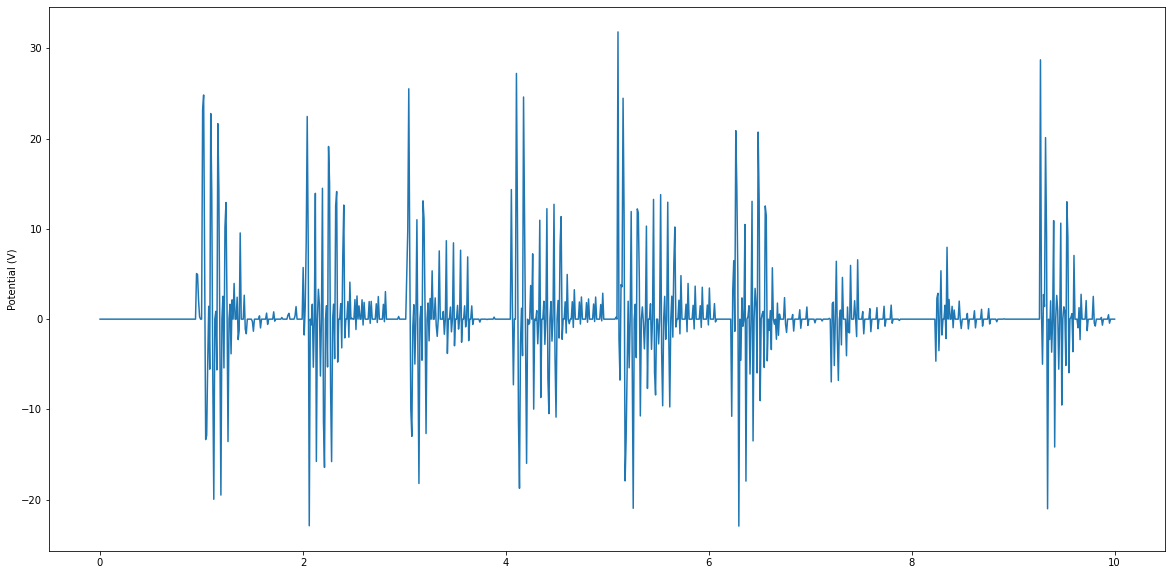

In [8]:
%matplotlib inline
test3 = pd.read_csv("test3_9inch.csv", header=0)
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=np.linspace(0,10,1000), y= test3['Potential (V)'])

In [28]:
def generateGraph(csvFilename):
    df = pd.read_csv(csvFilename, header=0)
    print(f"Maximum Voltage: {max(df['Potential (V)'])}")
    fig, ax = plt.subplots(figsize=(20,10))
    title = os.path.splitext(csvFilename)[0]
    ax.set_title(f"{title}: Potential sampled every 10ms")
    ax.set_xlabel('Seconds')
    sns.lineplot(x=np.linspace(0,10,1000), y= df['Potential (V)'])

Maximum Voltage: 20.746726989746094


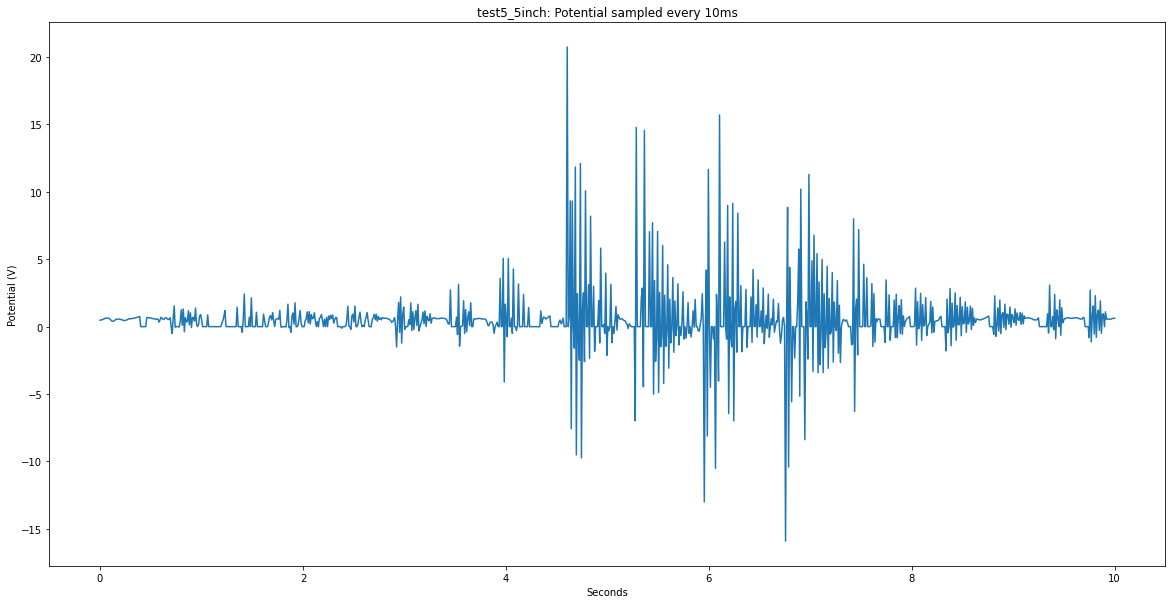

In [29]:
generateGraph('test5_5inch.csv')

In [41]:
def runTest(csvFilename):
    GDX = gdx()
    GDX.open_usb()
    GDX.select_sensors()
    with open(csvFilename, 'w', newline='') as csvFile:
        csv_writer = csv.writer(csvFile)
        GDX.start(period = 10)
        column_headers = GDX.enabled_sensor_info()
        csv_writer.writerow([datetime.now()])
        csv_writer.writerow(column_headers)
        for x in range(0,1000):
            measurements = GDX.read()
            if measurements == None:
                break
            csv_writer.writerow(measurements)
    GDX.stop()
    GDX.close()
    print(f"File saved in {os.getcwd()}")
    generateGraph(csvFilename)

Maximum Voltage: 34.09796142578125


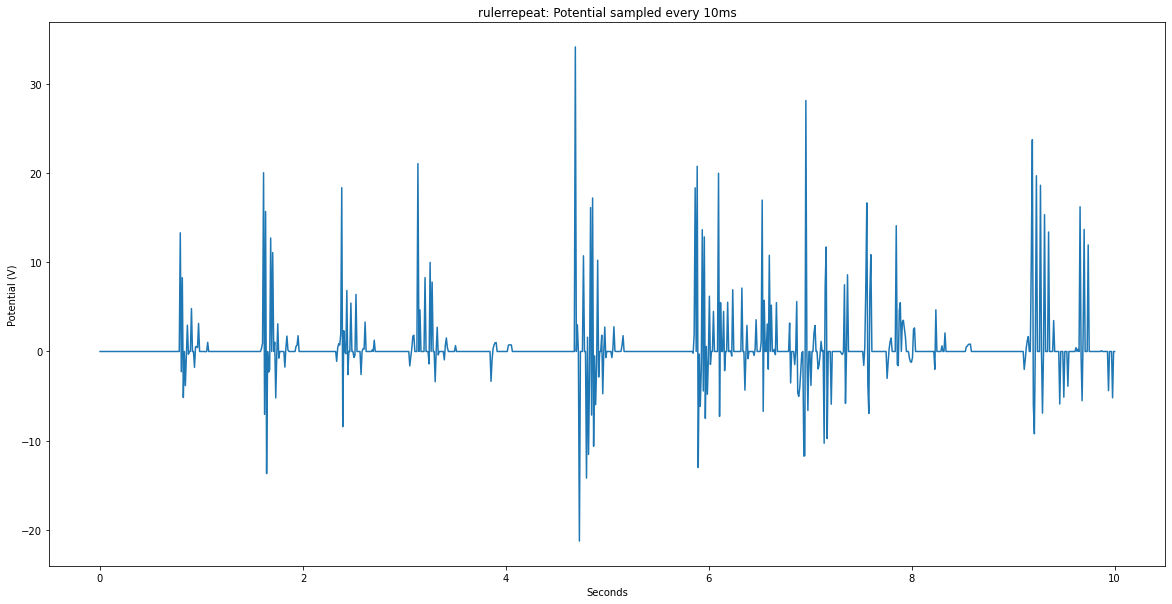

In [54]:
generateGraph('rulerrepeat.csv')

Maximum Voltage: 25.92977905273437


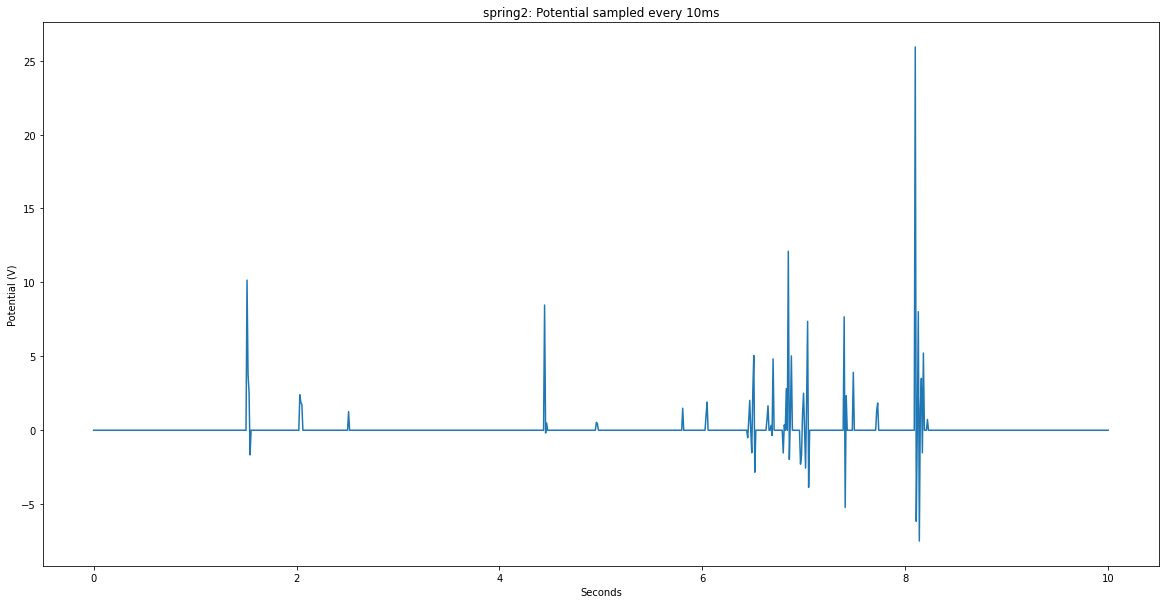

In [58]:
generateGraph('spring2.csv')

Maximum Voltage: 34.081695556640625


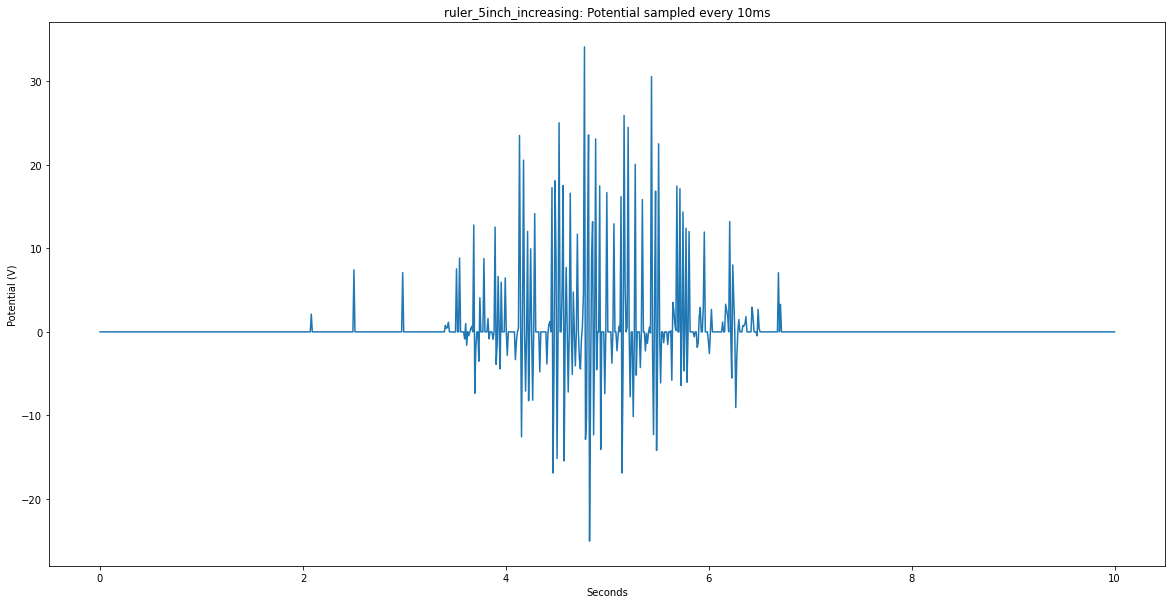

In [60]:
generateGraph("ruler_5inch_increasing.csv")

Maximum Voltage: 28.06913757324219


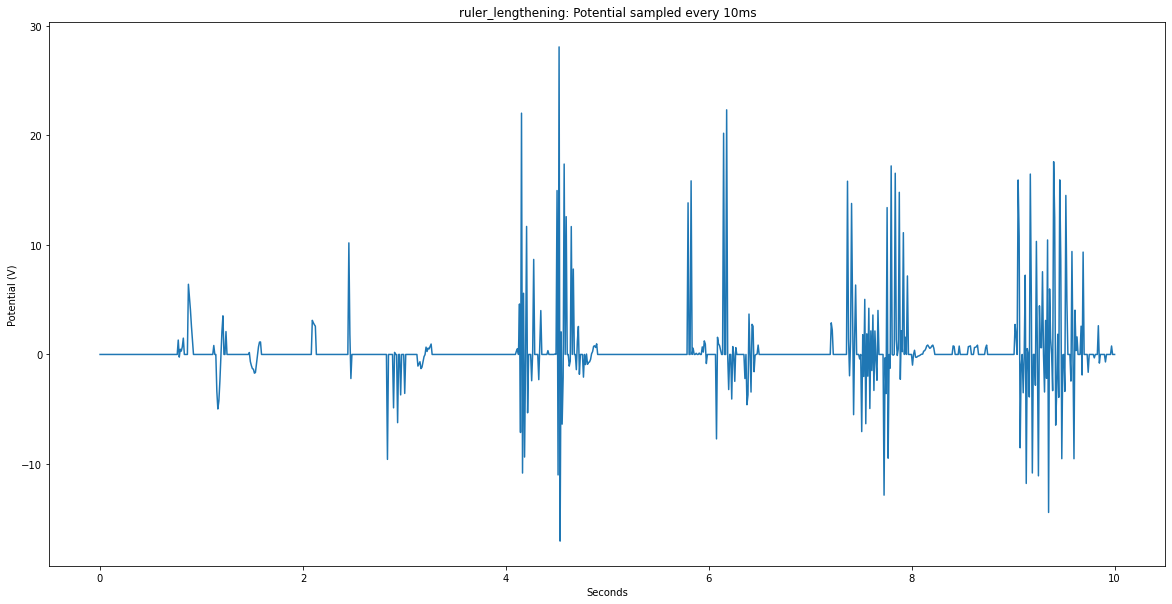

In [61]:
generateGraph("ruler_lengthening.csv")

Maximum Voltage: 5.6996192932128915


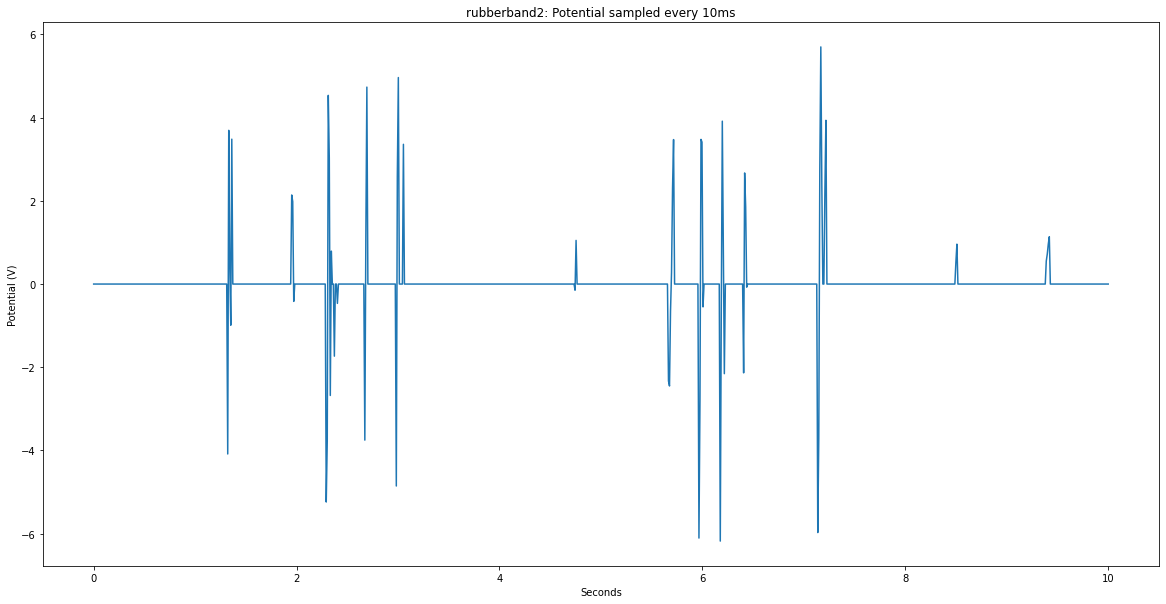

In [62]:
generateGraph('rubberband2.csv')